In [1]:
import argparse
import json
import os

import torch

from csnet.utils.model import get_model
from csnet.utils.predict import predict
from csnet.utils.plot import plot_projections

/research/sharedresources/cbi/common/Anna/anaconda3/envs/csnet/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
input_dir = 'data/semantic_3D/test/img'
output_dir = 'predictions/test'
model_path = 'model/2023-02-15-13-47-37/best_model.pth'  # replace by your model name

batch_size = 4

### Setup and load model 

In [3]:
with open(os.path.join(os.path.dirname(model_path), 'config.json')) as f:
    config = json.load(f)
config = argparse.Namespace(**config)
config

Namespace(epochs=30, batch_size=2, lr=0.0001, weight_decay=0.0005, factor=0.1, patience=2, roi_size=[32, 64, 64], model_path='model/2023-02-15-13-47-37', metric_name='Dice Metric', model='csnet', n_channels=[16, 32, 64, 128], num_res_units=1, log_progress=False, wandb_project='CSNet Test', data_dir='data/semantic_3D', train_dirname='train', val_dirname='val', img_dirname='img', gt_dirname='gt')

In [4]:
net = get_model(config)
net.load_state_dict(torch.load(model_path))

<All keys matched successfully>

### Predict

In [5]:
image, predicted = predict(input_dir, output_dir, net, roi_size=config.roi_size, return_last=True, batch_size=batch_size)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:06<00:00,  1.55it/s]


Low image data range; displaying image with stretched contrast.


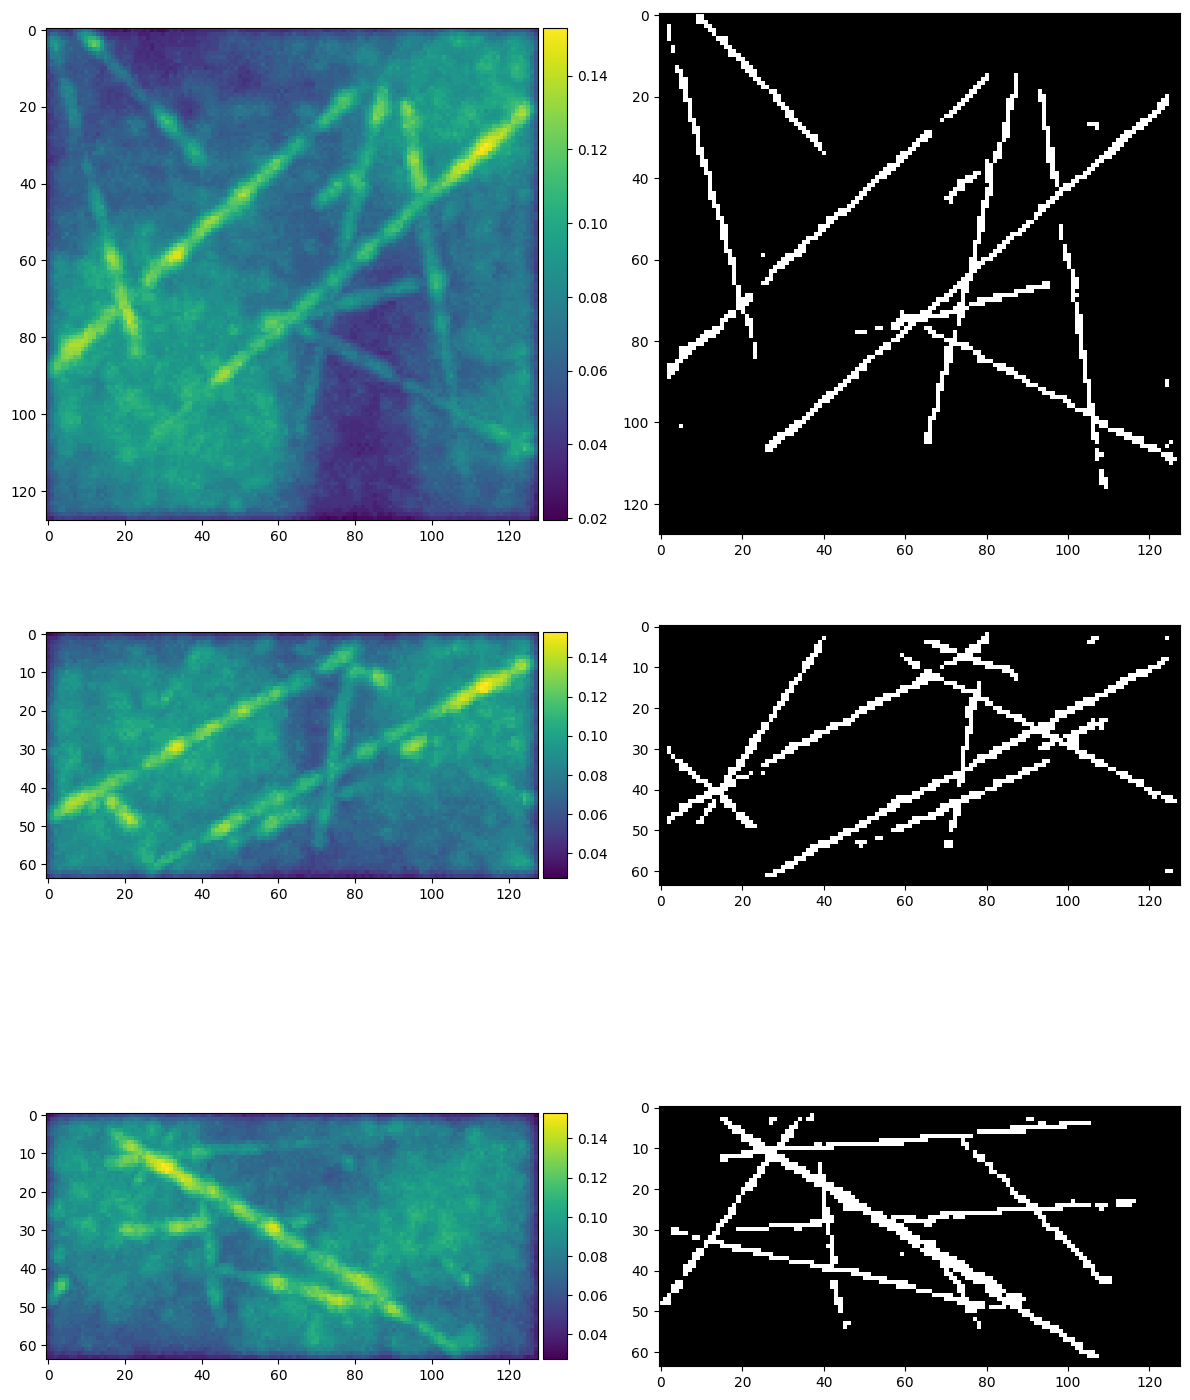

In [6]:
plot_projections([image, predicted], panel_size=6)